# Customer Churn Analysis

Here you can find the description of all the tasks. Same info and more can be found on this Project [Page](https://cms.master.school/final-project-jan23)

First review the project on this page and if you decide to work on this dataset follow the steps mentioned on above Project page


# The story Behind The Data
A bank is concerned that more and more customers are leaving its credit card services. They would really appreciate if someone could analyze it for them, in order to understand the main reasons for leaving the services, and to come up with recommendations for how the bank can mitigate that. Eventually, the bank would like to proactively implement these recommendations in order to keep their customers happy.

**A full ERD can be found [here](https://dbdiagram.io/d/638cdd8abae3ed7c45449eed)**

# Data Description
In this task, few datasets are provided:

1. **`BankChurners.csv`**   - this file contains basic information about each client (10 columns). The columns are:
    - `CLIENTNUM` - Client number. Unique identifier for the customer holding the account;
    - `Attrition Flag` - Internal event (customer activity) variable - if the client had churned (attrited) or not (existing).
    - `Dependent Count` - Demographic variable - Number of dependents
    - `Card_Category` - Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
    - `Months_on_book` - Period of relationship with bank
    - `Months_Inactive_12_mon` - No. of months inactive in the last 12 months
    - `Contacts_Count_12_mon` - No. of Contacts in the last 12 months
    - `Credit_Limit` - Credit Limit on the Credit Card
    - `Avg_Open_To_Buy` - Open to Buy Credit Line (Average of last 12 months)
    - `Avg_Utilization_Ratio` - Average Card Utilization Ratio
2. **`basic_client_info.csv`** - this file contains some basic client info per each client (6 columns) -
    - `CLIENTNUM` - Client number. Unique identifier for the customer holding the account
    - `Customer Age` - Demographic variable - Customer's Age in Years
    - `Gender` - Demographic variable - M=Male, F=Female
    - `Education_Level` - Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.`
    - `Marital_Status` - Demographic variable - Married, Single, Divorced, Unknown
    - `Income_Category` - Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)
3. **`enriched_churn_data.csv`** - this file contains some enriched data about each client (7 columns) -
    - `CLIENTNUM` - Client number. Unique identifier for the customer holding the account
    - `Total_Relationship_Count` - Total no. of products held by the customer
    - `Total_Revolving_Bal` - Total Revolving Balance on the Credit Card
    - `Total_Amt_Chng_Q4_Q1` - Change in Transaction Amount (Q4 over Q1)
    - `Total_Trans_Amt` - Total Transaction Amount (Last 12 months)
    - `Total_Trans_Ct` - Total Transaction Count (Last 12 months)
    - `Total_Ct_Chng_Q4_Q1` - Change in Transaction Count (Q4 over Q1)

# SQL tasks

1. How many clients does the bank have and are above the age of 50?
2. What’s the distribution (in %) between male and female clients?
3. Let’s define a new variable called `age_group`:
    - 10 < x ≤ 30
    - 30 < x ≤ 40
    - 40 < x ≤ 50
    - 50 < x ≤ 60
    - 60 <x ≤ 120
    
    Per each `age_group`, `marital_status` and `income_category`, find out the following values:
    
    a. Churn_rate (in %)
    
    b. Average `Total_Relationship_Count`
    
    c. Minimum value of `Total_Amt_Chng_Q4_Q1`
    
    d. Count of customers
    
    Make sure to order the data by the number of customers in a descending order***
    
4. Out of the male clients, who holds the “blue” card, how many (in %) hold the income category 40K - 60K?

5. Without the usage of group by at all, find the 3rd and 4th highest client IDs (`CLIENTNUM`’s) of `Total_Amt_Chng_Q4_Q1`?

6. We’re interested in knowing which client (CLIENTNUM) has the 2nd highest `Total_Trans_Amt`, Per each `Marital_Status`. 

The bank will create a dedicated campaign and target these specific clients moving forward. In this step, help the bank find these clients.

In order to start writing and running SQL queries here in Workspace, you have a SQL type cell. New cell can be added by clicking on "Add SQL". Masterschool hosts a Postgres DB with all Capstone project datasets. To connect to MS server you need to choose relevant integration. Choose according to the dataset you explore. 

In [1]:
--1. How many clients does the bank have and are above the age of 50?
SELECT count(*) AS total_clients, 
(SELECT count(*) FROM basic_client_info WHERE customer_age >= 50) AS over_50_count
FROM basic_client_info

,total_clients,over_50_count
0,10127,3530


In [2]:
--2. What’s the distribution (in %) between male and female clients?
WITH F_pct AS (SELECT count(*) AS f_Count FROM basic_client_info WHERE gender='F'),
M_pct AS (SELECT count(*) AS m_Count FROM basic_client_info WHERE gender='M'),
T_cnt AS (SELECT count(*) AS t_Count FROM basic_client_info)

SELECT round(f_Count/t_Count::numeric,2)*100 || '%' AS Female_percent,
       round(m_Count/t_Count::numeric,2)*100 || '%' AS Male_percent 
FROM F_pct, M_pct, T_cnt;

,female_percent,male_percent
0,53.00%,47.00%


In [2]:
--Q3. Per each age_group, marital_status and income_category, find out the following values:
--Churn_rate (in %),Average Total_Relationship_Count,Minimum value of Total_Amt_Chng_Q4_Q1,Count of customers
--Make sure to order the data by the number of customers in a descending order***
WITH cte_age AS (SELECT CLIENTNUM,
                 CASE 
                 WHEN customer_age > 10 and customer_age <= 30 THEN '10 < x ≤ 30'
                 WHEN customer_age > 30 and customer_age <= 40 THEN '30 < x ≤ 40'
                 WHEN customer_age > 40 and customer_age <= 50 THEN '40 < x ≤ 50'
                 WHEN customer_age > 50 and customer_age <= 60 THEN '50 < x ≤ 60'
                 WHEN customer_age > 60 and customer_age <= 120 THEN '60 < x ≤ 120'
                 END AS age_group
                 FROM basic_client_info),
    cte_churn AS (select CLIENTNUM,
                  case when attrition_flag = '1' then 1
                       when attrition_flag = '0' then 0
                       end as churn_pct
                  from bankchurners)
select
ca.age_group, bc.marital_status, bc.income_category
,round(avg(churn_pct)::numeric,3)*100 || '%' AS churn_rate
,round(avg(Total_Relationship_Count)::numeric,2) AS Avg_Total_Relationship_Count, 
min(Total_Amt_Chng_Q4_Q1) AS Min_Total_Amt_Chng_Q4_Q1, count(bc.CLIENTNUM) AS Count_of_customers
from enriched_churn_data en
join bankchurners ch on ch.clientnum=en.clientnum
join basic_client_info bc on bc.clientnum=en.clientnum
join cte_age ca on ca.clientnum=bc.clientnum
join cte_churn cc on cc.clientnum=en.clientnum
group by 1,2,3
order by 7 desc

,age_group,marital_status,income_category,churn_rate,avg_total_relationship_count,min_total_amt_chng_q4_q1,count_of_customers
0,40 < x ≤ 50,Married,Less than $40K,18.600%,3.76,0.061,735
1,40 < x ≤ 50,Single,Less than $40K,17.800%,3.72,0.275,557
2,50 < x ≤ 60,Married,Less than $40K,15.500%,3.91,0.046,453
3,50 < x ≤ 60,Single,Less than $40K,19.100%,3.64,0.241,388
4,40 < x ≤ 50,Married,$40K - $60K,19.100%,3.79,0.196,366
...,...,...,...,...,...,...,...
111,10 < x ≤ 30,Single,$120K +,50.000%,4.00,0.558,2
112,60 < x ≤ 120,Divorced,Unknown,0.000%,4.00,0.808,2
113,10 < x ≤ 30,Divorced,$120K +,0.000%,3.00,0.828,1
114,10 < x ≤ 30,Unknown,$60K - $80K,0.000%,3.00,0.524,1


In [4]:
--4. Out of the male clients, who holds the “blue” card, how many (in %) hold the income category 40K - 60K?
SELECT 
round(count(*)/(SELECT count(*) FROM basic_client_info WHERE gender='M')::numeric,2)*100 || '%' AS male_blue_pct
FROM basic_client_info bc
JOIN bankchurners ch ON ch.clientnum=bc.clientnum
WHERE bc.gender='M' AND ch.card_category='Blue' and bc.income_category='$40K - $60K'

,male_blue_pct
0,15.00%


In [5]:
--5.Without the usage of group by at all, find the 3rd and 4th highest client IDs (CLIENTNUM’s) 
--of Total_Amt_Chng_Q4_Q1?
WITH cte_id AS (
    SELECT clientnum,
       row_number() OVER (
           ORDER BY clientnum DESC    
       ) row_num,
       Total_Amt_Chng_Q4_Q1
FROM enriched_churn_data
)
SELECT clientnum,Total_Amt_Chng_Q4_Q1
FROM cte_id
WHERE row_num IN (3,4)

,clientnum,total_amt_chng_q4_q1
0,828294933,0.765
1,828291858,0.630


In [3]:
--6. Which client (CLIENTNUM) has the 2nd highest Total_Trans_Amt, Per each Marital_Status.
SELECT  clientnum,
        marital_status,
        total_trans_amt
FROM (
    SELECT row_number() OVER (
    PARTITION BY marital_status
        ORDER BY total_trans_amt DESC) row_num,
        e.clientnum,
        marital_status,
        total_trans_amt
    FROM basic_client_info b
    JOIN enriched_churn_data e
         ON b.clientnum=e.clientnum
) t
WHERE 
    row_num = 2;

,clientnum,marital_status,total_trans_amt
0,716894658,Divorced,16824
1,717642633,Married,17995
2,716004258,Single,17634
3,719848008,Unknown,16098


## Tableau Tasks

This Tableau task lets you be creative with the way you build your dashboard and only gives guidance on the types of visualizations you should use.

Create a dashboard that will contain at least 5 out of the 8 requirements defined below:

1. **At least 2 KPIs** as Big Ass Numbers. Choose the metrics on your own that will fit with the rest of your analysis. Examples of metrics:
    - Total number of clients
    - Churn rate %
    - Average transaction amount per customer
    - Average transaction amount before churn
    - etc.
2. **Churn rate %** among different **age groups**. You will need to:
    - Use the Bins function to split client age into age ranges
    - Define Churn rate % as a calculated field
    - Choose the way of visualizing the comparison
3. **A Scatterplot** visualizing certain customer spending behaviors and their connection to the churn if exists. For example, you can compare Total transaction amount and Total transaction count of each client and use color to mark churned and existing customers. 
4. **A Highlight Table** comparing Churn rate % among two demographic dimensions (from *basic_client_info* table), where one is placed on Rows and another on Columns, forming a matrix. 
5. **A Bar Chart** with multiple metrics by Clientnum, where each row represents one Client and has multiple metrics as columns. Add a few filters or parameters to let user drill down into the set of clients they are interested in.
6. **A Pareto Analysis** based on custom defined **customer segment**. 
    - Segment can include values from the demographic information of the client. For example,
        - Gender | Income
        - Gender | Income | Marital status
        - etc.
    - Choose the metric to analyse. For example,
        - Total number of clients (People from which customer segments most often become our clients?)
        - Churn rate absolute (How many churned customers we have in each segment?)
        - Churn rate % (What is the relative churn rate in each customer segment?)
        - etc.
7. **At least 1 parameter** that allows dashboard user to interact with the dashboard. For example,
    - to change the metric used in the chart(s)
    - to change the value of a benchmark
8. At least one **more visualization of your choice** adds value to your analysis.

_Use this cell to add your Tableau links. We encourage you also to add here screenshots from your Tableau dashboard with explanations._
#### The Tableau dashboard is in this [link](https://public.tableau.com/views/proj2_16761751070630/CustomerChurnAnalysis?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

#### Summary
> The upper visual has three KPIs with a filter to choose which card type to break down the analysis per selected type. If we included all card types, we can see the overall churn rate is 16.1% with average transaction amount per customer is about 4404, and there are about 10127 customers in total.

> The second visual shows how the credit limits are connected to the income category with changes in attrition rate corresponding to the card type selected. The trend shows the higher the income category, the higher the credit limits offered by the bank. If we selected the 'Blue' card type, for example, the highest churn rate is 17.5% at the income level of 120K+, then the rate lowered into 13.5% at the income range of 60K-80K, it then moved back up to 17.2% when the income is less than 40K.

In [5]:
%%html
<img src="screen1.png",width=60,height=60>

#### Summary
> The scatterplot shows that the Transaction Amount and Transaction Count are positively correlated for Existing customers. They tend to have very low or zero churn rate for those doing more than 100 transactions with transaction amounts of greater than 12K. On the other hand, those Attrited customers tend to have lower transaction counts (say 90) and smaller transaction amounts (11K). Beyond these values, no churned customers can be found. 

> In the bar chart visual, the churn rate line displays a pattern that as the number of products increases - the possibility of a customer to go elsewhere tend to decreases. Even when it runs against different measures like credit limits or revolving balance, similar patterns emerge.

> From the previous finding, the bank may consider one strategy to lessen its customer churn rate. It can encourage existing customers with marketing incentives to acquire additional product offerings from the bank. The finding illustrates that as the relationship deepened, the possibility for a customer to stick around tends to rise. 

In [9]:
%%html
<img src="screen2.png",width=10,height=10>
<img src="screen2b.png",width=10,height=10>

#### Summary
> From the bar chart visual, the trend shows that the highest churn rate are in the 40 and 50 age groups when comparing with other categories. Both groups have churn rate of 17%. If the bank decided to reduce customer churn rate, perhaps it can focus its marketing efforts and promotional incentives on these two groups.

> In the highlight table that shows the relationship between income and education, we can see the highest churn can be found in those customers of having a doctorate degree with an income level of less than 40K.

In [10]:
%%html
<img src="screen3.png",width=10,height=10>
<img src="screen3b.png",width=10,height=10>

_For_ deep dive analysis and EDA follow the guidelines on project [page](https://cms.master.school/final-project-jan23)

In [1]:
# Let's see how we can easily query the data
# Start working here if you choose to use Python for this part of the project
# Libraries
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading + let's see the head of each file we have 
bank_churners_df = pd.read_csv('bankchurners.csv')
basic_client_info_df = pd.read_csv('basic_client_info.csv')
enriched_churn_df = pd.read_csv('enriched_churn_data.csv')

### Summary Statistics

In [4]:
"""Basic statistics of BankChurners dataset"""
print("BankChurners rows & columns =>",bank_churners_df.shape)
print("BankChurners rows =>")
bank_churners_df.head(3)

BankChurners rows & columns => (10127, 10)
BankChurners rows =>


,clientnum,attrition_flag,dependent_count,card_category,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,avg_open_to_buy,avg_utilization_ratio
0,806160108,Existing Customer,1,Blue,56,2,3,3193.0,676.0,0.788
1,804424383,Existing Customer,1,Blue,56,3,2,10215.0,9205.0,0.099
2,708300483,Attrited Customer,0,Blue,56,4,3,7882.0,7277.0,0.077


In [13]:
print("BankChurners Descriptive Statisics =>")
bank_churners_df.describe()

BankChurners Descriptive Statisics =>


,clientnum,dependent_count,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,avg_open_to_buy,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,2.346203,35.928409,2.341167,2.455317,8631.953698,7469.139637,0.274894
std,3.690378e+07,1.298908,7.986416,1.010622,1.106225,9088.776650,9090.685324,0.275691
min,7.080821e+08,0.000000,13.000000,0.000000,0.000000,1438.300000,3.000000,0.000000
25%,7.130368e+08,1.000000,31.000000,2.000000,2.000000,2555.000000,1324.500000,0.023000
50%,7.179264e+08,2.000000,36.000000,2.000000,2.000000,4549.000000,3474.000000,0.176000
75%,7.731435e+08,3.000000,40.000000,3.000000,3.000000,11067.500000,9859.000000,0.503000
max,8.283431e+08,5.000000,56.000000,6.000000,6.000000,34516.000000,34516.000000,0.999000


In [14]:
"""Basic statistics of basic_client_info dataset"""
print("Basic_client_info rows & columns =>",basic_client_info_df.shape)
print("Basic_client_info rows =>")
basic_client_info_df.head(3)

Basic_client_info rows & columns => (10127, 6)
Basic_client_info rows =>


,clientnum,customer_age,gender,education_level,marital_status,income_category
0,708082083,45,F,High School,Married,Less than $40K
1,708083283,58,M,Unknown,Single,$40K - $60K
2,708084558,46,M,Doctorate,Divorced,$80K - $120K


In [15]:
print("Basic_client_info Descriptive Statisics =>")
basic_client_info_df.describe()

Basic_client_info Descriptive Statisics =>


,clientnum,customer_age
count,1.012700e+04,10127.000000
mean,7.391776e+08,46.325960
std,3.690378e+07,8.016814
min,7.080821e+08,26.000000
25%,7.130368e+08,41.000000
50%,7.179264e+08,46.000000
75%,7.731435e+08,52.000000
max,8.283431e+08,73.000000


In [16]:
"""Basic statistics of enriched_churn_data dataset"""
print("Enriched_churn_data rows & columns =>",enriched_churn_df.shape)
print("Enriched_churn_data rows =>")
enriched_churn_df.head(3)

Enriched_churn_data rows & columns => (10127, 7)
Enriched_churn_data rows =>


,clientnum,total_relationship_count,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,total_trans_ct
0,828343083,3,1793,0.803,3646,0.659,68
1,828298908,4,2035,0.613,1770,0.741,47
2,828294933,3,2437,0.765,2519,0.565,36


In [17]:
print("Enriched_churn_data Descriptive Statisics =>")
enriched_churn_df.describe()

Enriched_churn_data Descriptive Statisics =>


,clientnum,total_relationship_count,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,total_trans_ct
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,3.812580,1162.814061,0.759941,4404.086304,0.712222,64.858695
std,3.690378e+07,1.554408,814.987335,0.219207,3397.129254,0.238086,23.472570
min,7.080821e+08,1.000000,0.000000,0.000000,510.000000,0.000000,10.000000
25%,7.130368e+08,3.000000,359.000000,0.631000,2155.500000,0.582000,45.000000
50%,7.179264e+08,4.000000,1276.000000,0.736000,3899.000000,0.702000,67.000000
75%,7.731435e+08,5.000000,1784.000000,0.859000,4741.000000,0.818000,81.000000
max,8.283431e+08,6.000000,2517.000000,3.397000,18484.000000,3.714000,139.000000


In [18]:
#Check for duplicates in datasets to decide if merge is feasible
print(any(bank_churners_df['clientnum'].duplicated()))
print(any(basic_client_info_df['clientnum'].duplicated()))
print(any(enriched_churn_df['clientnum'].duplicated()))

False
False
False


In [3]:
"""Merge the datasets into a dataframe for further analysis"""
df=bank_churners_df.merge(basic_client_info_df,on='clientnum').merge(enriched_churn_df,on='clientnum')
df.shape

(10127, 21)

In [28]:
#statistics of merged dataframe
print('Merged df shape =>',df.shape)
print('Merged df info =>')
df.info()
print('Merged df Descriptive Statistic =>')
df.describe()

Merged df shape => (10127, 21)
Merged df info =>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   dependent_count           10127 non-null  int64  
 3   card_category             10127 non-null  object 
 4   months_on_book            10127 non-null  int64  
 5   months_inactive_12_mon    10127 non-null  int64  
 6   contacts_count_12_mon     10127 non-null  int64  
 7   credit_limit              10127 non-null  float64
 8   avg_open_to_buy           10127 non-null  float64
 9   avg_utilization_ratio     10127 non-null  float64
 10  customer_age              10127 non-null  int64  
 11  gender                    10127 non-null  object 
 12  education_level           10127 non-null  object 
 13  marital_stat

,clientnum,dependent_count,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,avg_open_to_buy,avg_utilization_ratio,customer_age,total_relationship_count,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,total_trans_ct
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,2.346203,35.928409,2.341167,2.455317,8631.953698,7469.139637,0.274894,46.325960,3.812580,1162.814061,0.759941,4404.086304,0.712222,64.858695
std,3.690378e+07,1.298908,7.986416,1.010622,1.106225,9088.776650,9090.685324,0.275691,8.016814,1.554408,814.987335,0.219207,3397.129254,0.238086,23.472570
min,7.080821e+08,0.000000,13.000000,0.000000,0.000000,1438.300000,3.000000,0.000000,26.000000,1.000000,0.000000,0.000000,510.000000,0.000000,10.000000
25%,7.130368e+08,1.000000,31.000000,2.000000,2.000000,2555.000000,1324.500000,0.023000,41.000000,3.000000,359.000000,0.631000,2155.500000,0.582000,45.000000
50%,7.179264e+08,2.000000,36.000000,2.000000,2.000000,4549.000000,3474.000000,0.176000,46.000000,4.000000,1276.000000,0.736000,3899.000000,0.702000,67.000000
75%,7.731435e+08,3.000000,40.000000,3.000000,3.000000,11067.500000,9859.000000,0.503000,52.000000,5.000000,1784.000000,0.859000,4741.000000,0.818000,81.000000
max,8.283431e+08,5.000000,56.000000,6.000000,6.000000,34516.000000,34516.000000,0.999000,73.000000,6.000000,2517.000000,3.397000,18484.000000,3.714000,139.000000


In [55]:
print('Merged df sample rows =>')
df.sample(5)

Merged df sample rows =>


,clientnum,attrition_flag,dependent_count,card_category,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,avg_open_to_buy,avg_utilization_ratio,...,gender,education_level,marital_status,income_category,total_relationship_count,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,total_trans_ct
2335,815525508,Existing Customer,3,Blue,41,1,4,1515.0,1515.0,0.000,...,F,High School,Unknown,Less than $40K,2,0,0.819,3894,0.818,60
4932,714917583,Existing Customer,2,Silver,36,1,2,10074.0,8995.0,0.107,...,F,Doctorate,Unknown,Less than $40K,6,1079,0.813,3338,0.711,65
8143,709901058,Existing Customer,1,Blue,30,2,1,2232.0,1069.0,0.521,...,M,High School,Single,$40K - $60K,2,1163,0.557,4185,0.778,80
1453,771086208,Existing Customer,2,Blue,44,4,4,6256.0,4726.0,0.245,...,F,Graduate,Married,Less than $40K,3,1530,0.647,1629,0.344,43
5816,779922183,Existing Customer,1,Blue,36,2,2,2253.0,272.0,0.879,...,F,High School,Married,Less than $40K,2,1981,0.550,4758,0.723,81


### Outliers Detection

###### Numeric type columns

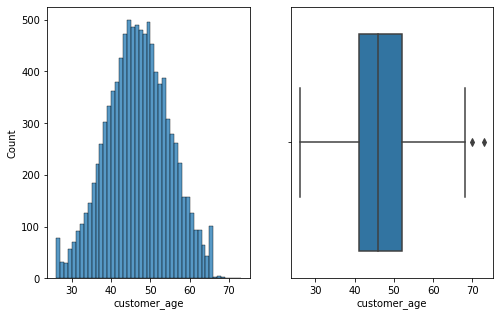

In [72]:
#Find if there are outliers in total_trans_act
fig, axs = plt.subplots(1,2, figsize=(8,5))
sns.histplot(data=df, x='customer_age', ax=axs[0])
sns.boxplot(data=df, x='customer_age', ax=axs[1]);

###### In comparison with other age groups, we can see the occurence of those customer ages above 70 is very low, so it can be considered an outlier.

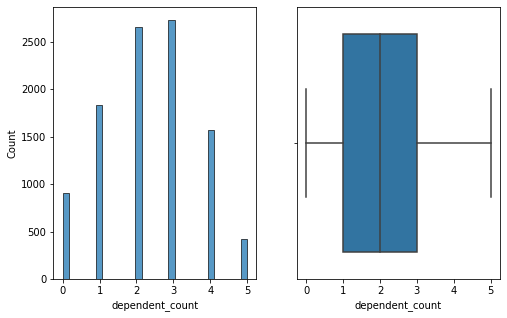

In [73]:
#Find if there are outliers in dependent_count
fig, axs = plt.subplots(1,2, figsize=(8,5))
sns.histplot(data=df, x='dependent_count', ax=axs[0])
sns.boxplot(data=df, x='dependent_count', ax=axs[1]);

###### No outliers in the dependent count

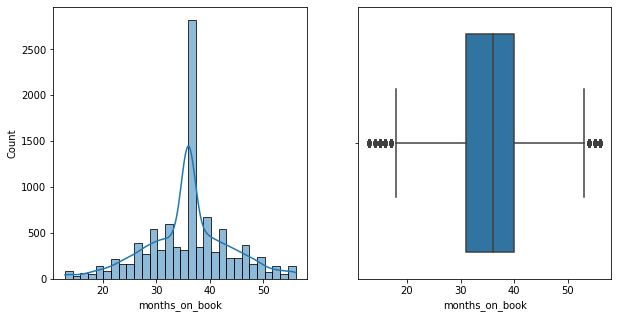

In [88]:
#Find if there are outliers in months_on_book
fig, axes=plt.subplots(1,2,figsize=(10,5))
sns.histplot(data=df,x='months_on_book',bins=30,ax=axes[0],kde=True)
sns.boxplot(data=df, x='months_on_book',ax=axes[1]);

###### The main distribution is between 30 and 40 as shown in the histogram. There are a few outliers in the range from 0 to 20, and above 55.

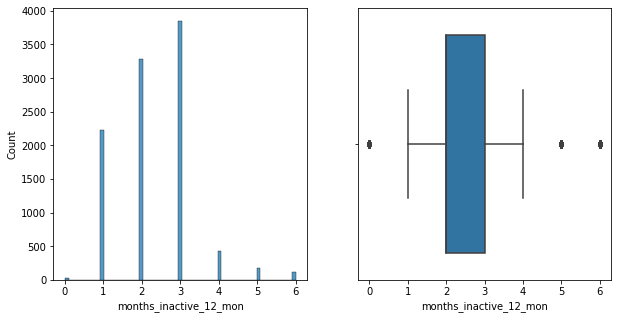

In [4]:
#Find if there are outliers in months_inactive_12_mon
fig, axes=plt.subplots(1,2,figsize=(10,5))
sns.histplot(data=df, x='months_inactive_12_mon', ax=axes[0])
sns.boxplot(data=df, x='months_inactive_12_mon', ax=axes[1]);

##### The main distribution is between 1 and 3.  There are a few outlier in the range from 0 to 1, and between 5 and 6.

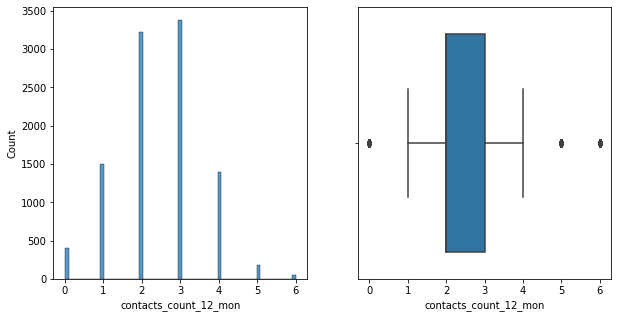

In [5]:
#Find if there are outliers in contacts_count_12_mon
fig, axes=plt.subplots(1,2,figsize=(10,5))
sns.histplot(data=df, x='contacts_count_12_mon', ax=axes[0])
sns.boxplot(data=df, x='contacts_count_12_mon', ax=axes[1]);

###### The main distribution is the range from 1 to 4. There are a few outliers between 0 and 1, and between 5 and 6 as well. 

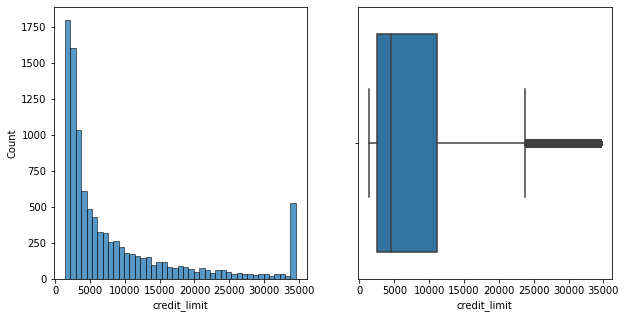

In [91]:
#Find if there are outliers in credit_limit
fig, axes=plt.subplots(1,2, figsize=(10,5))
sns.histplot(data=df, x='credit_limit', ax=axes[0])
sns.boxplot(data=df, x='credit_limit', ax=axes[1]);

###### The main distribution is right skewed as the histogram has shown. There are many data points in the outlier areas from 25000 to 35000. 

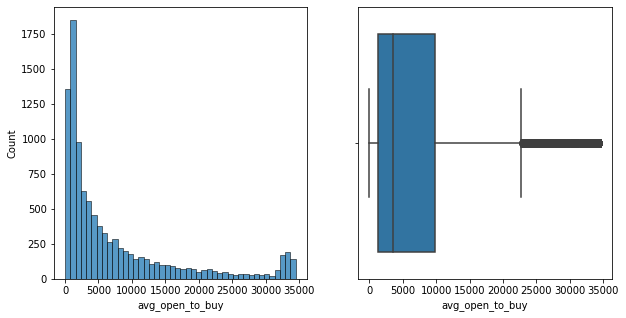

In [92]:
#Check outliers of avg_open_to_buy
fig, axes=plt.subplots(1,2, figsize=(10,5))
sns.histplot(data=df, x='avg_open_to_buy', ax=axes[0])
sns.boxplot(data=df, x='avg_open_to_buy', ax=axes[1]);

###### This distribution is right skewed as shown in the histogram. There are many data points beyond 23000 can be considered as outliers. 

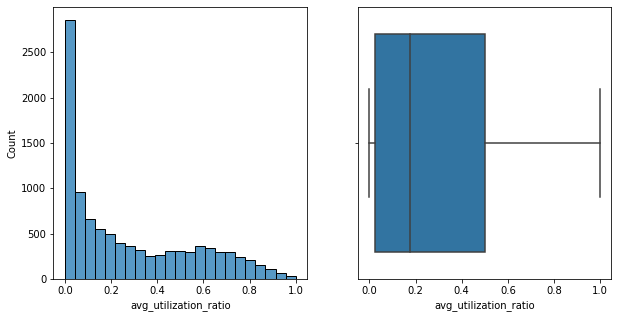

In [93]:
#Find if there are outliers in avg_utilization_ratio
fig, axes=plt.subplots(1,2, figsize=(10,5))
sns.histplot(data=df, x='avg_utilization_ratio', ax=axes[0])
sns.boxplot(data=df, x='avg_utilization_ratio', ax=axes[1]);

######    No outlier detected.

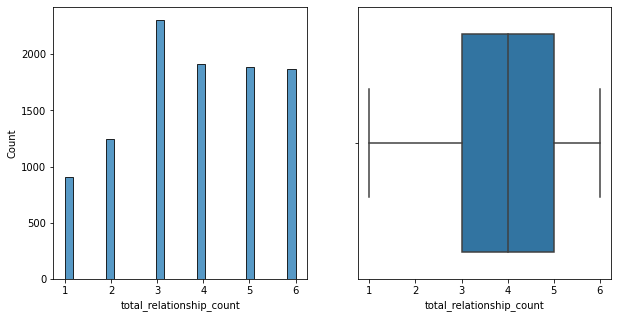

In [6]:
#Check outliers of total_relationship_count
fig, axes=plt.subplots(1,2, figsize=(10,5))
sns.histplot(data=df, x='total_relationship_count', ax=axes[0])
sns.boxplot(data=df, x='total_relationship_count', ax=axes[1]);

###### No outlier detected.

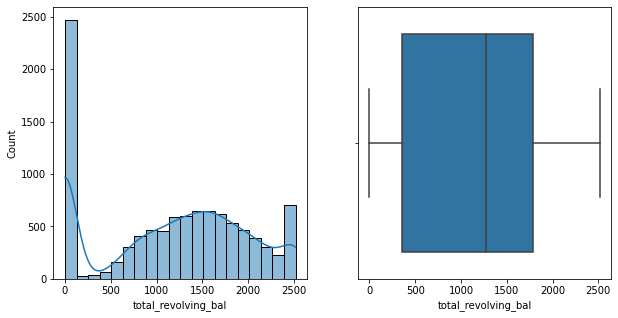

In [95]:
#Find if there are outliers in total_revolving_bal
fig, axes=plt.subplots(1,2, figsize=(10,5))
sns.histplot(data=df, x='total_revolving_bal', ax=axes[0], kde=True)
sns.boxplot(data=df, x='total_revolving_bal', ax=axes[1]);

###### No outlier detected.

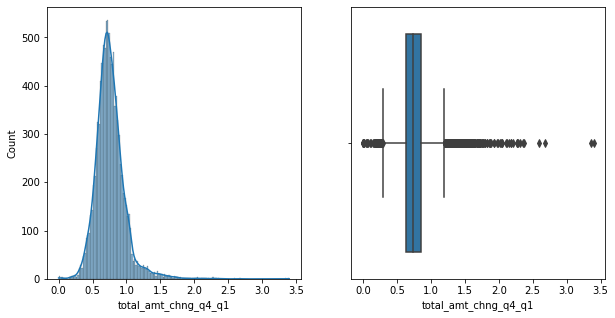

In [97]:
#Find if there are outliers in total_amt_chng_q4_q1
fig, axes=plt.subplots(1,2, figsize=(10,5))
sns.histplot(data=df, x='total_amt_chng_q4_q1', ax=axes[0], kde=True)
sns.boxplot(data=df, x='total_amt_chng_q4_q1', ax=axes[1]);

###### There are many data points in the range from 0 to 0.5, and beyond 1.4 can be considered as outliers.

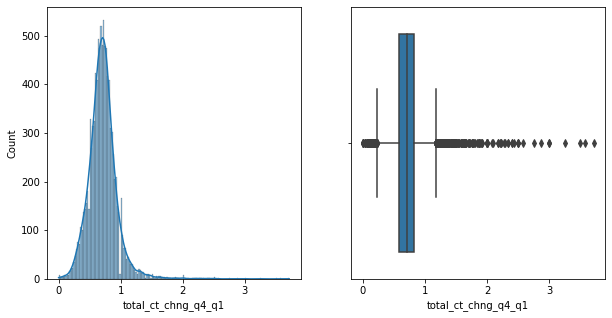

In [98]:
#Check outliers of total_ct_chng_q4_q1
fig, axes=plt.subplots(1,2, figsize=(10,5))
sns.histplot(data=df, x='total_ct_chng_q4_q1', ax=axes[0], kde=True)
sns.boxplot(data=df, x='total_ct_chng_q4_q1', ax=axes[1]);

###### The many data points in the range from 0 to 0.3, and beyond 1.3 can be considered as identifiers.

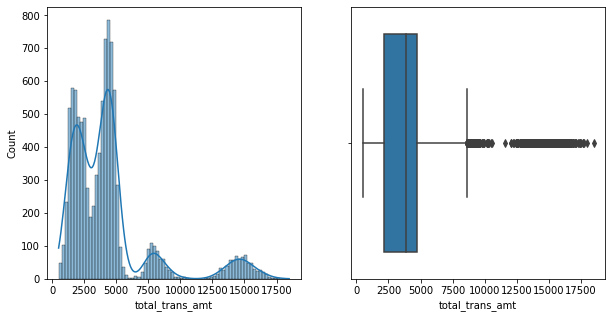

In [99]:
#Find if there are outliers in total_trans_amt
fig, axes=plt.subplots(1,2, figsize=(10,5))
sns.histplot(data=df, x='total_trans_amt', ax=axes[0], kde=True)
sns.boxplot(data=df, x='total_trans_amt', ax=axes[1]);

###### The histogram shows multimodal distbribution. The many data points beyond 17500 can be viewed as outliers.

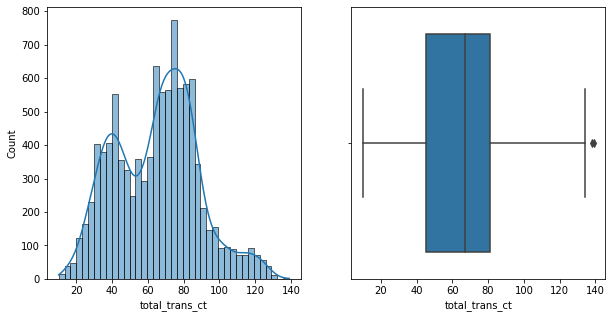

In [100]:
#Find if there are outliers in total_trans_act
fig, axes=plt.subplots(1,2, figsize=(10,5))
sns.histplot(data=df, x='total_trans_ct', ax=axes[0], kde=True)
sns.boxplot(data=df, x='total_trans_ct', ax=axes[1]);

###### The histogram shows a bimodal distribution. And  a few data points above 140 can be looked at as outliners. 

###### Non-numeric type columns

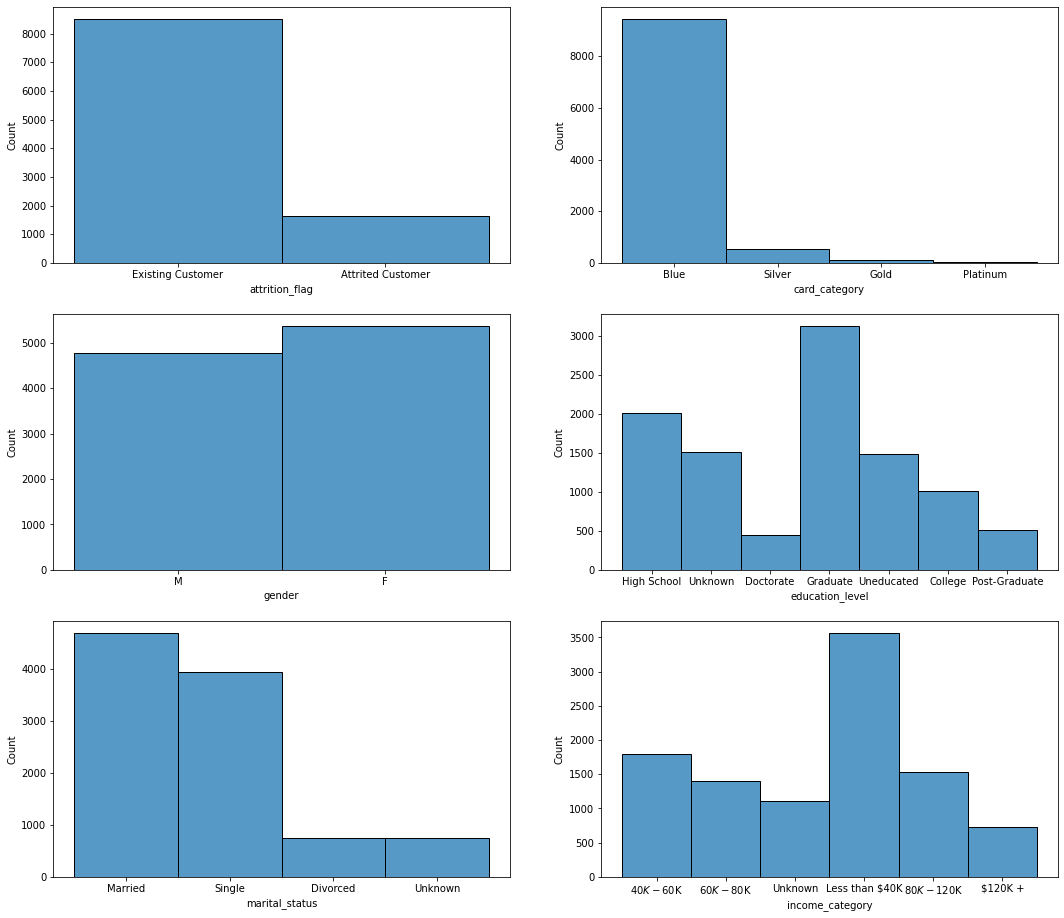

In [31]:
dict_list={
    'attrition_flag':['Existing Customer','Attrited Customer'],
    'card_category':['Blue', 'Silver', 'Gold', 'Platinum'],
    'gender':['M','F'],
    'education_level':['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate'],
    'marital_status':['Married', 'Single', 'Divorced', 'Unknown'],
    'income_category':['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']}

fig, axes = plt.subplots(3, 2, figsize=[18, 16])
for i, var in enumerate(dict_list):
    sns.histplot(data=df ,x=var ,ax=axes[i//2][i%2])

### Summary

1. No duplicates or missing values in the merged dataframe df.
2. Existing customers are much more than the churned ones.
3. Over 90% of customers are Blue card holders.
4. Female customers are more than male ones.
5. Customers with income less than 40k make up the highest percentage of customer base. 
6. The count of Married customers is the largest among all the groups in the Marital Status category.
7. Customers who are Graduate make up the largetst group in the Education Level category.
8. There are Unknown values in the demographic variables that need to be cleaned for data quality.

### Data Cleaning

In [5]:
#create a backup of the original df
df_cleaned = df.copy()
df_cleaned.head(3)
df_cleaned.shape

(10127, 21)

In [6]:
#create a churned customer column for further analysis
df_cleaned['churned_customer']=df_cleaned['attrition_flag'].apply(lambda x: 1 if x=='Attrited Customer' else 0)

In [7]:
#Replace unknown with NAN in variables that have Unknown values to improve data quality
clean_list=['marital_status', 'education_level', 'income_category']

for var in clean_list:
    df_cleaned[var] = df_cleaned[var].replace('Unknown', np.nan)

print(df_cleaned['education_level'].value_counts())
print(df_cleaned['marital_status'].value_counts())
print(df_cleaned['income_category'].value_counts())

Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: education_level, dtype: int64
Married     4687
Single      3943
Divorced     748
Name: marital_status, dtype: int64
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: income_category, dtype: int64


In [8]:
#Change these variables into categorical with correct order to facilitate grouping and visualization
order_dict = {
    'education_level': ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate'],
    'income_category': ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +'],
    'card_category':['Blue','Silver', 'Gold', 'Platinum'],
    'marital_status':['Married', 'Single', 'Divorced']}

#Assign each varible to categorical type
for key, value in order_dict.items():
    correct_order = pd.api.types.CategoricalDtype(categories=value, ordered=True)
    df_cleaned[key] = df_cleaned[key].astype(correct_order)

#Check result type
df_cleaned[order_dict.keys()].dtypes

education_level    category
income_category    category
card_category      category
marital_status     category
dtype: object

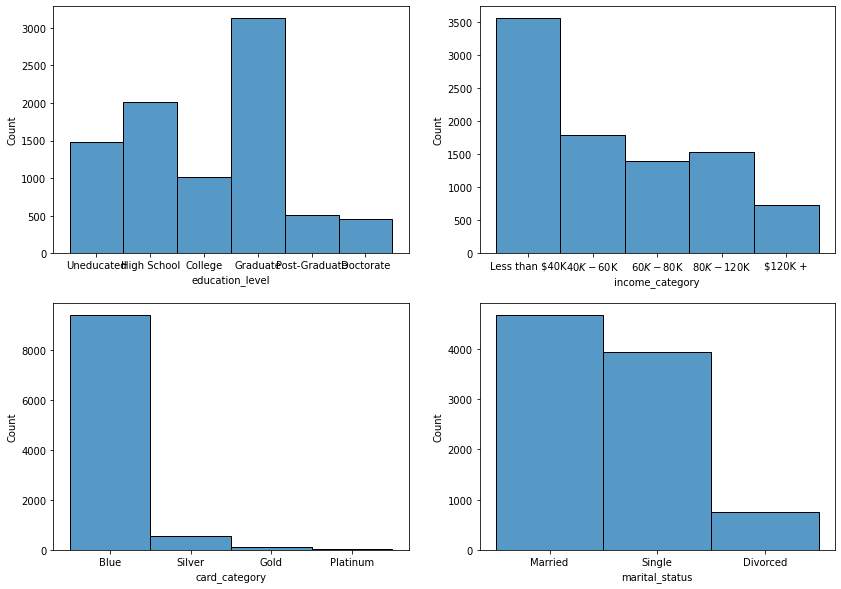

In [33]:
#visualize order as assgined 
fig, axes = plt.subplots(2, 2, figsize=[14, 10])
for i, var in enumerate(order_dict):
    sns.histplot(data=df_cleaned ,x=var ,ax=axes[i//2][i%2])

### Distribution Analysis

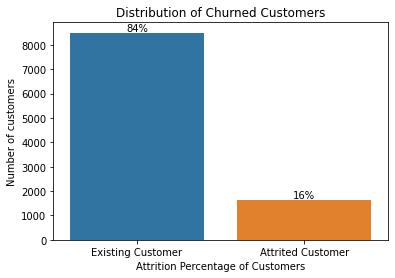

In [32]:
#Distribution of Attrition Status

ax = sns.countplot(x=df_cleaned['attrition_flag'],
                   order=df_cleaned['attrition_flag'].value_counts(ascending=False).index);
rel_values = df_cleaned['attrition_flag'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p:.0f}%' for p in rel_values]
ax.bar_label(container=ax.containers[0], labels=lbls)
plt.title('Distribution of Churned Customers')
plt.xlabel('Attrition Percentage of Customers')
plt.ylabel('Number of customers');

##### Churn rate is around 16% out of total customers base. In other words, 16 customers out of 100 will be churned throughout their engagement with the bank. 

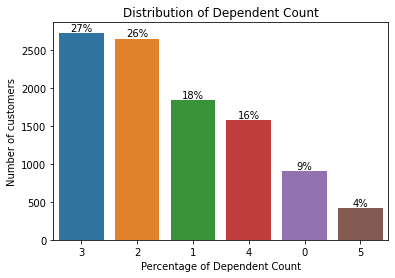

In [37]:
#Distribution of Dependent Count

ax = sns.countplot(x=df_cleaned['dependent_count'],
                   order=df_cleaned['dependent_count'].value_counts(ascending=False).index);
rel_values = df_cleaned['dependent_count'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p:.0f}%' for p in rel_values]
ax.bar_label(container=ax.containers[0], labels=lbls)
plt.title('Distribution of Dependent Count')
plt.xlabel('Percentage of Dependent Count')
plt.ylabel('Number of customers');

##### Over half of customers base (or 53%) have 2 to 3 dependents on record.

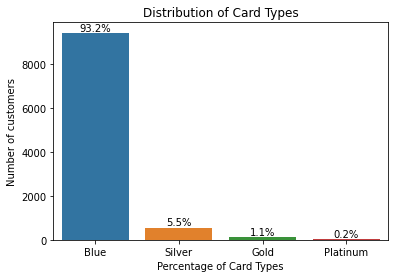

In [41]:
##Distribution of Card Category

ax = sns.countplot(x=df_cleaned['card_category'],
                   order=df_cleaned['card_category'].value_counts(ascending=False).index);
rel_values = df_cleaned['card_category'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p:.1f}%' for p in rel_values]
ax.bar_label(container=ax.containers[0], labels=lbls)
plt.title('Distribution of Card Types')
plt.xlabel('Percentage of Card Types')
plt.ylabel('Number of customers');

###### Over 93% of customers are 'Blue' card holders and a very small proportion (0.2%) of them own 'Platinum' cards.  

<Figure size 216x144 with 0 Axes>

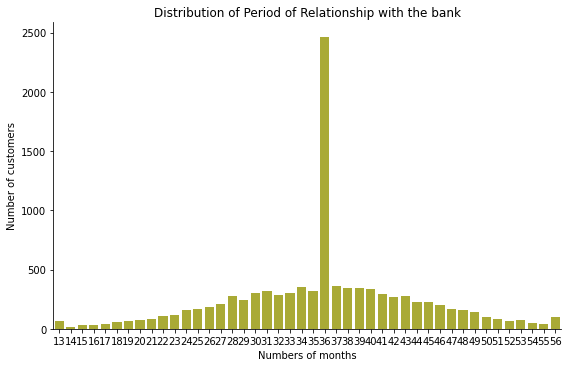

In [34]:
#Months_on_book - Period of relationship with bank

plt.figure(figsize = [3, 2])
base=sns.color_palette()[8]
sns.catplot(data=df_cleaned, x='months_on_book', kind='count', color=base, aspect=1.6);
plt.xlabel("Numbers of months")
plt.ylabel("Number of customers")
plt.title('Distribution of Period of Relationship with the bank');

###### In terms of the number of months a customer engaged with the bank, it ranges from 13 months to 56 months. The most popular period is 36 months with the highest count of customers in the distribution.

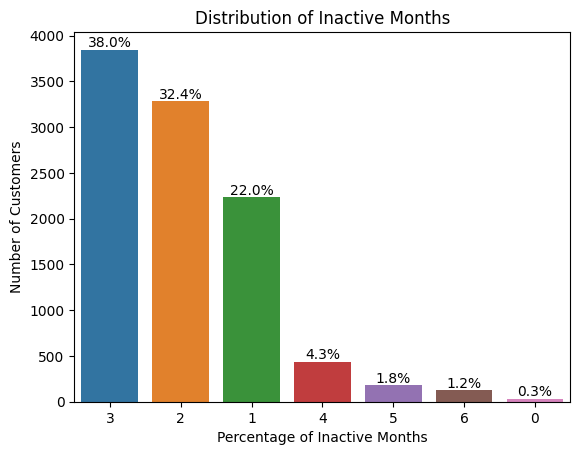

In [43]:
#Distribution of Inactive Months 

ax = sns.countplot(x=df_cleaned['months_inactive_12_mon'],
                   order=df_cleaned['months_inactive_12_mon'].value_counts(ascending=False).index);
rel_values = df_cleaned['months_inactive_12_mon'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p:.1f}%' for p in rel_values]
ax.bar_label(container=ax.containers[0], labels=lbls)
plt.title('Distribution of Inactive Months')
plt.xlabel('Percentage of Inactive Months')
plt.ylabel('Number of Customers');

###### In terms of number of months inactive in the last 12 months, around 92% of the customers have a 1-month to 3-month inactive periods over a 12 month duration.   

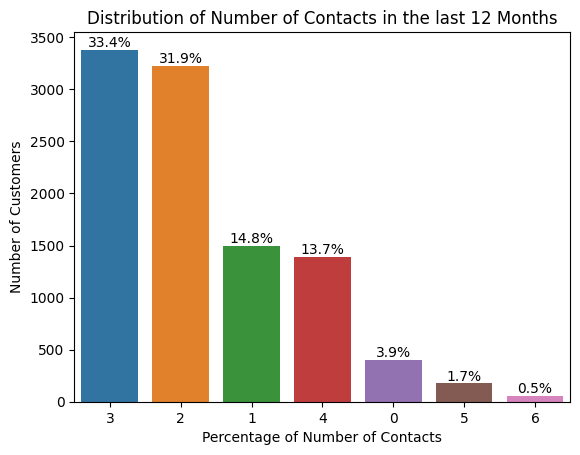

In [48]:
#Distribution of Number of Contacts in the last 12 months

ax = sns.countplot(x=df_cleaned['contacts_count_12_mon'],
                   order=df_cleaned['contacts_count_12_mon'].value_counts(ascending=False).index);
rel_values = df_cleaned['contacts_count_12_mon'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p:.1f}%' for p in rel_values]
ax.bar_label(container=ax.containers[0], labels=lbls)
plt.title('Distribution of Number of Contacts in the last 12 Months')
plt.xlabel('Percentage of Number of Contacts')
plt.ylabel('Number of Customers');

###### Majority of customers (around 80%) make 1 to 3 contacts with the bank over the last 12 months. 

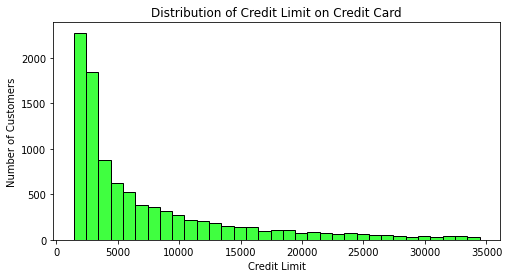

In [30]:
#Distribution of Credit Limit on the Credit Card

credit_bins = np.arange(df_cleaned['credit_limit'].min(), df_cleaned['credit_limit'].max()+0.5, 1000)
plt.figure(figsize=[8, 4])

sns.histplot(data=df_cleaned, x='credit_limit', color='lime',bins=credit_bins);
plt.title('Distribution of Credit Limit on Credit Card')
plt.xlabel('Credit Limit')
plt.ylabel('Number of Customers');

###### Majority of the customers have their credit limits spread in the range of 2500 - 10000.

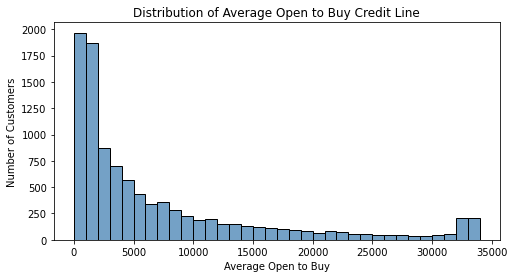

In [14]:
#Distribution of Avg_Open_To_Buy - Open to Buy Credit Line (Average of last 12 months)

credit_bins = np.arange(df_cleaned['avg_open_to_buy'].min(), df_cleaned['avg_open_to_buy'].max()+0.5, 1000)
plt.figure(figsize=[8, 4])
sns.histplot(data=df_cleaned, x='avg_open_to_buy', color='steelblue',bins=credit_bins);
plt.title('Distribution of Average Open to Buy Credit Line')
plt.xlabel('Average Open to Buy')
plt.ylabel('Number of Customers');

###### The Open to Buy for the majority of customers are in the range of 1000-12000 over the last 12 months.

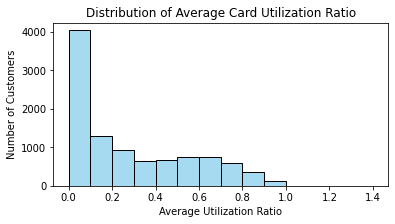

In [15]:
#Distribution of Avg_Utilization_Ratio - Average Card Utilization Ratio

pct_bins = np.arange(df_cleaned['avg_utilization_ratio'].min(),df_cleaned['avg_utilization_ratio'].max()+0.5,0.1)
plt.figure(figsize=[6, 3])
sns.histplot(data=df_cleaned,x='avg_utilization_ratio',color='skyblue',bins=pct_bins);
plt.title('Distribution of Average Card Utilization Ratio')
plt.xlabel('Average Utilization Ratio')
plt.ylabel('Number of Customers');

###### Customers with a card utilization rate between 0 and 10% have the highest count.

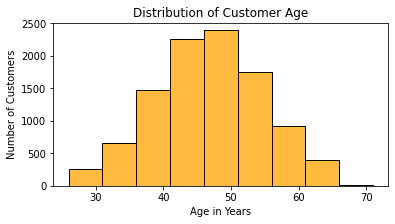

In [19]:
#Distribution of Customer's Age in Years

age_bins = np.arange(df_cleaned['customer_age'].min(),df_cleaned['customer_age'].max()+0.5,5)
plt.figure(figsize=[6, 3])
sns.histplot(data=df_cleaned,x='customer_age',color='orange',bins=age_bins);
plt.title('Distribution of Customer Age')
plt.xlabel('Age in Years')
plt.ylabel('Number of Customers');

###### The age range for majority of customers are between 35 and 55. 

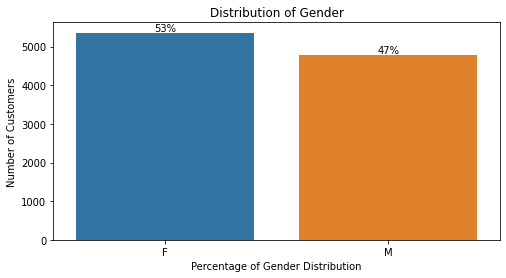

In [24]:
#Distribution of Gender

plt.figure(figsize=[8, 4])
ax = sns.countplot(x=df_cleaned['gender'],
                   order=df_cleaned['gender'].value_counts(ascending=False).index);
rel_values = df_cleaned['gender'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p:.0f}%' for p in rel_values]
ax.bar_label(container=ax.containers[0], labels=lbls)
plt.title('Distribution of Gender')
plt.xlabel('Percentage of Gender Distribution')
plt.ylabel('Number of Customers');

###### In terms of total count, female customers have a higher percentage than male ones. 

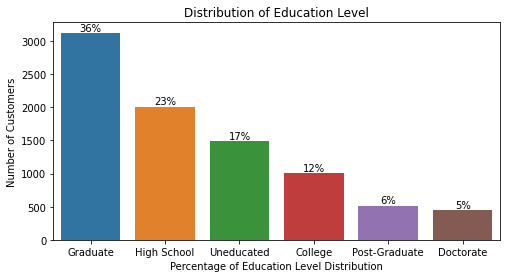

In [25]:
#Distribution of Education Level

plt.figure(figsize=[8, 4])
ax = sns.countplot(x=df_cleaned['education_level'],
                   order=df_cleaned['education_level'].value_counts(ascending=False).index);
rel_values = df_cleaned['education_level'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p:.0f}%' for p in rel_values]
ax.bar_label(container=ax.containers[0], labels=lbls)
plt.title('Distribution of Education Level')
plt.xlabel('Percentage of Education Level Distribution')
plt.ylabel('Number of Customers');

###### Over half of customers (59%) have graduate and high school education level.

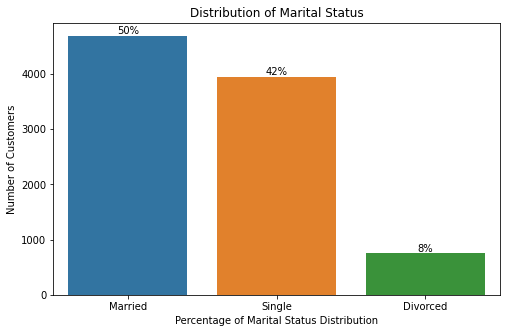

In [27]:
#Distribution of Marital Status

plt.figure(figsize=[8, 5])
ax = sns.countplot(x=df_cleaned['marital_status'],
                   order=df_cleaned['marital_status'].value_counts(ascending=False).index);
rel_values = df_cleaned['marital_status'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p:.0f}%' for p in rel_values]
ax.bar_label(container=ax.containers[0], labels=lbls)
plt.title('Distribution of Marital Status')
plt.xlabel('Percentage of Marital Status Distribution')
plt.ylabel('Number of Customers');

###### Married status has the highest percentage among customers base.

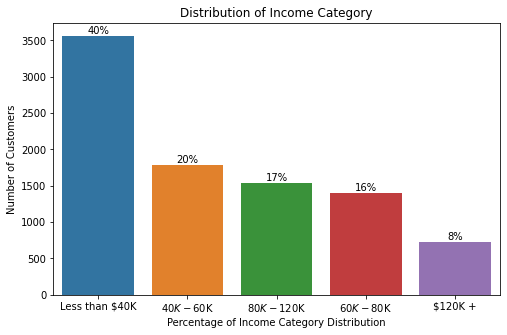

In [37]:
#Distribution of Income Category

plt.figure(figsize=[8, 5])
ax = sns.countplot(x=df_cleaned['income_category'],
                   order=df_cleaned['income_category'].value_counts(ascending=False).index);
rel_values = df_cleaned['income_category'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p:.0f}%' for p in rel_values]
ax.bar_label(container=ax.containers[0], labels=lbls)
plt.title('Distribution of Income Category')
plt.xlabel('Percentage of Income Category Distribution')
plt.ylabel('Number of Customers');

###### Around 40% of customers (the largest proportion in total customer count) earned less than 40k. Next group of customers earned between 40k to 60k constitutes 20% of the total customer population. Together, they are two-thirds of customers base.

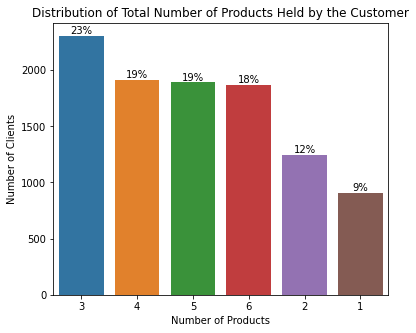

In [56]:
#Distribution of Total number of products held by the customer

plt.figure(figsize=[6, 5])
ax=sns.countplot(x=df_cleaned['total_relationship_count'],
                order=df_cleaned['total_relationship_count'].value_counts(ascending=False).index);
rel_values = df_cleaned['total_relationship_count'].value_counts(ascending=False, normalize=True).values * 100;
lbls = [f'{p:.0f}%' for p in rel_values]
ax.bar_label(container=ax.containers[0], labels=lbls);

plt.xlabel('Number of Products')
plt.ylabel('Number of Clients')
plt.title('Distribution of Total Number of Products Held by the Customer');

###### Around 23% of customers have three products offered by the bank. Another three groups of customers are between 18% to 19% in proportion that held 4 to 6 products from the bank.

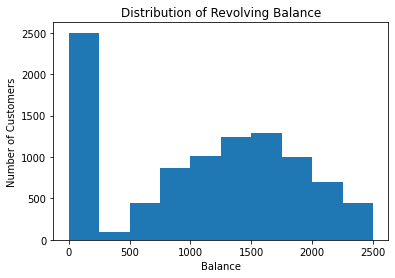

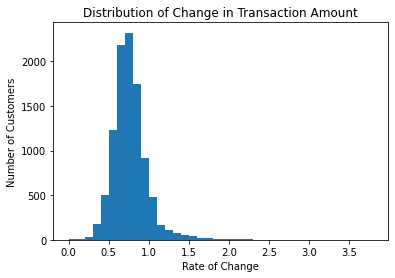

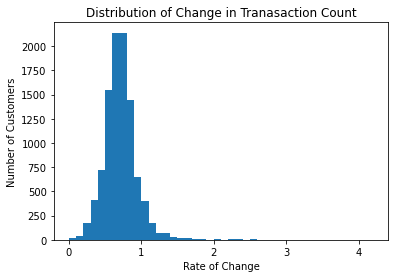

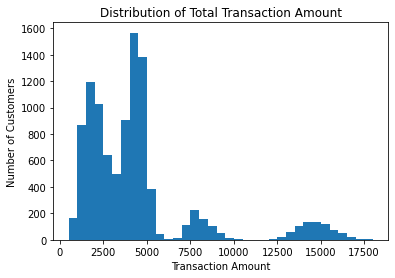

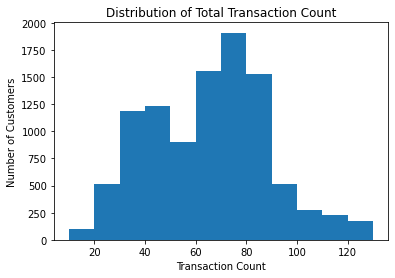

In [27]:
#Distribution of enriched data about each client

amount_dict={'total_revolving_bal': [250, 'Distribution of Revolving Balance','Balance'],
             'total_amt_chng_q4_q1':[0.1, 'Distribution of Change in Transaction Amount', 'Rate of Change'],
             'total_ct_chng_q4_q1': [0.1, 'Distribution of Change in Tranasaction Count','Rate of Change'],
             'total_trans_amt': [500, 'Distribution of Total Transaction Amount', 'Transaction Amount'],
             'total_trans_ct': [10,'Distribution of Total Transaction Count','Transaction Count']}

for i, key in enumerate(amount_dict):
    pct_bins = np.arange(df_cleaned[key].min(),df_cleaned[key].max()+0.5,amount_dict[key][0])
    plt.hist(data=df_cleaned, x=key, bins=pct_bins)
    plt.title(amount_dict[key][1])
    plt.xlabel(amount_dict[key][2])
    plt.ylabel('Number of Customers')
    plt.show()

### Summary 
1. For revolving balance, lots of people have 0 balance. The rest is relatively distrubuted evenly across different ranges.
2. Change in Transaction Amount and Change in Transaction Count are right skewed with outliers found beyond 2.0. 
3. The Total Transaction Amount is right skewed with two peaks around 1500 and 4000 followed by another two smaller peaks on around 7500 and 1300. 
4. Total Transaction Count has peak around 70 to 80 with another spike around 40.
5. Churn rate is around 16% with over 9 out of 10 customers are 'Blue' card holders.
6. Over half of customers have 2 to 3 dependents; majority of customers have age range between 35 and 55. Female customers have a higher proportion than male counterpart in the total customer base. Married customers constitute the highest percentage among customers base. Lastly, more than half of customers (59%) customers have education level of either high school or graduate.
7. The number of months a customer engaged or period of relationship with the bank is 36 months as the most common period. 
8. Over 9 out of 10 customers stay inactive for 1 to 3 months during the last 12 months. On the other hand, those customers with a card utilization rate between 0 and 10% have the highest count among different groups.
9. Around 80% of customers make 1 to 3 contacts with the bank over the last 12 months. Meanwhile, close to a quarter (23%) of customers have three products offered by the bank. 
10. The largest group of customers (40%) earned less than 40k. With next group of 20% that earned between 40k to 60k make up two-thirds of total customer population.
11. The Open to Buy credit for majority of customers are in the range of 1000 - 12000 in the last 12 months.
12. The credit limits spread for majority of customers are in the range of 2500 - 15000.

### Cross-Correlation Analysis

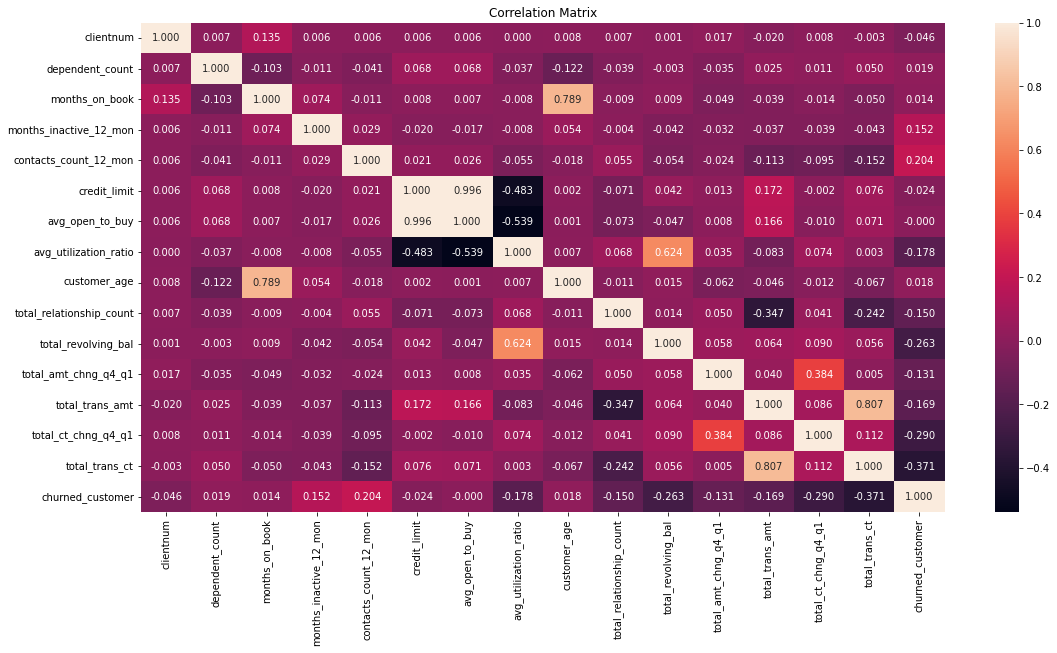

In [30]:
#correlation of numerical variables

num_vars = df_cleaned.select_dtypes(include=[int,float]).columns.tolist()
plt.figure(figsize=[18,9])
sns.heatmap(data=df_cleaned[num_vars].corr(),annot=True,fmt='.3f')
plt.title('Correlation Matrix')
plt.show();

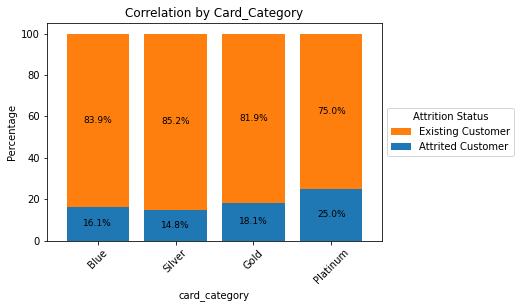

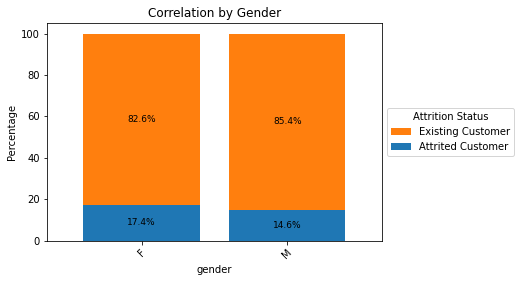

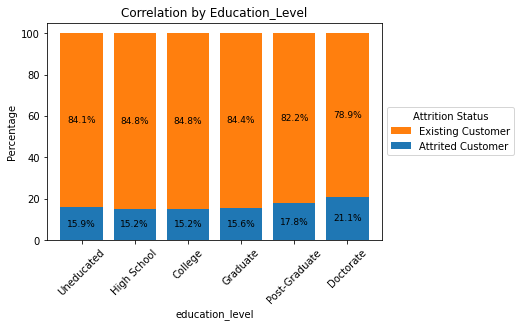

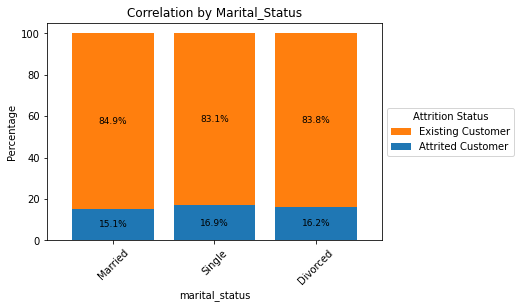

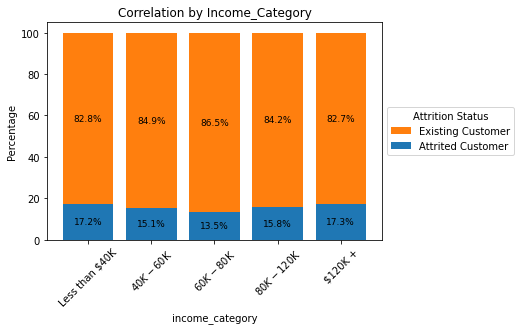

In [26]:
#Find relationship between these variables and Attrition Flag?

def churn_corr(catVar, mainVar='attrition_flag'):
    df_corr=df_cleaned.groupby(catVar)[mainVar].value_counts(normalize = True).mul(100).unstack()
    ax=df_corr.plot.bar(stacked = True, rot = 0, width = 0.8)
    handles, labels = ax.get_legend_handles_labels() 
    ax.legend(reversed(handles),reversed(labels),loc='center left',bbox_to_anchor=(1,0.5),title='Attrition Status')
    plt.xticks(rotation = 45)
    plt.ylabel('Percentage')
    plt.title('Correlation by {}'.format(catVar.title()))
    for patch in ax.patches:
        plt.annotate(f"{patch.get_height():.1f}%",
                    (patch.get_x()+patch.get_width()/2, 
                     patch.get_y()+patch.get_height()/2), 
                     ha='center',va='center',color='black',fontsize=9)
    plt.show()

plots=[churn_corr(c) for c in ['card_category','gender','education_level','marital_status','income_category']]

### Summary

1. Positive correlation: 'customer_age' and 'months_on_book', 'avg_open_to_buy' and 'credit_limit', 'total_trans_amt' and 'total_trans_ct'.
   Negative correlation: 'dependent_count' and 'months_on_book', 'credit_limit' and 'avg_utilization_ratio', 'avg_utilization_ratio' and 'avg_open_to_buy', 'total_relationship_count' and 'total_trans_amt'.
   
2. 'Platinum' card holders tend to churn higher than other card type customers.

3. Gender seems to has little impact on churn as both sexes have very similar churn rate.

4. Marital Status seems to have no influence on churn as all categories have little variation in their churn rate. 

5. Customers with doctorate degree tend to have higher churn rate than customers with other education level. This suggests education level can influence churn rate albeit a relative moderate one.

6. Income level tend to have no effect on churn as all income groups show similar churn rate.

### Raising Data Questions

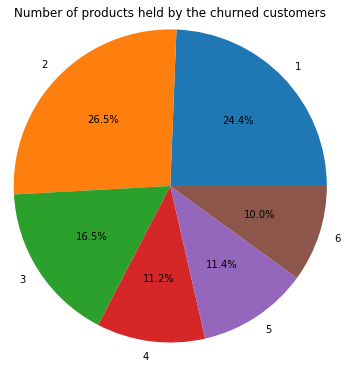

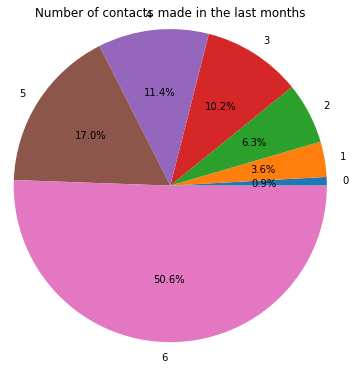

In [23]:
#1. Have the number of products held by the churned customers had any influence on churned rate?
#2. Have the number of contacts made by the churned customers had any influence on churned rate?

def churn_count(var):
    plt.figure(figsize=(12, 6))
    seg=df_cleaned.groupby(var)['churned_customer'].mean()
    plt.pie(seg,labels=seg.index,autopct="%0.1f%%",radius=1.2);
    
count_dict={'total_relationship_count': 'Number of products held by the churned customers',
            'contacts_count_12_mon': 'Number of contacts made in the last months'}

for i in count_dict.keys():
    churn_count(df_cleaned[i]);
    plt.title(count_dict[i])
    plt.show()

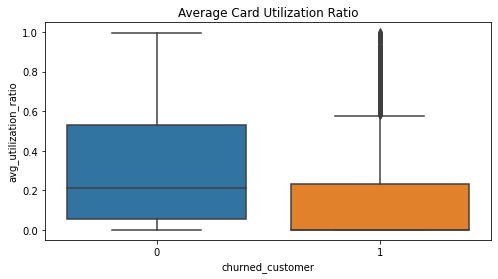

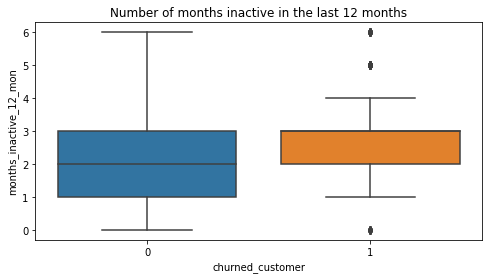

In [27]:
#3. Has the utilization ratio had any effects on churn rate?
#4. Has the number of inactive months had any effects on churn rate?
    
def churn_num(var):
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_cleaned,x='churned_customer',y=var);
    
num_dict={'avg_utilization_ratio':'Average Card Utilization Ratio',
          'months_inactive_12_mon':'Number of months inactive in the last 12 months'}

for i in num_dict.keys():
    churn_num(df_cleaned[i]);
    plt.title(num_dict[i])
    plt.show()

### Summary

1. Customers with 1 to 2 products tend to churn more than those with more products. 
2. When the number of contacts increases, the churn rate tend to goes up accordingly.
3. Those churned customers tend to have lower utilization ratio in the range 0 to 0.2. 
4. Those customers that stayed inactive for 2 to 3 months tend to have higher chance of leaving.

### Data Enrichment

In order to enrich the datasets, the bank should gather additional information such as time-related transaction 
details, customer’s profile attributes like occupation, credit score, address, and assets data. These data elements
would help the bank improve the quality of its services:
- transaction-time details like year, month, day allow the bank to build up a customer’s profile over time and observing the dynamics of contacting the customer continuously.
- additional elements like occupation and credit score will deepen the bank’s knowledge about its customers. These details provide a trove of insights about the customers that the bank can tap into for future opportunities.
- the bank can expand its systems and processes to capture the reasons and conditions on why customers are leaving. This allows the bank to know why and come up with solutions to lower customers churn. 

### Recommendations

- Enlarge marketing and selling efforts on existing customers so they acquire more products from the bank. As the analysis has shown, the deeper the relationship a customer has with the bank, the more stable the engagement is.
- Conduct a detailed analysis on those churned customers from their history of contacting the bank. If the bank has a tool to monitor the customers contact operations, it might be able to persuade a customer from leaving before it happened or come up with measures to enhance services in the future.
- Take a proactive approach in reaching out to customers. The bank can contact a customer if he/she did not have any transaction, say, for 2 to 3 months. This could enhance customer care and may prevent a customer from going elsewhere for banking services.
- As majority of customers are Blue card holders, this may be an opportunity for the bank to conduct deeper analysis on how this sector links with other attributes like education, income, risk scores, and the like. Insights and patterns gained from these analyses could yield opportunities in cross-marketing, risks management, and services enhancement.